<a href="https://colab.research.google.com/github/RuleOfNight/cifar10/blob/main/cifar10_with_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/cyizhuo/CIFAR-10-dataset.git

fatal: destination path 'CIFAR-10-dataset' already exists and is not an empty directory.


In [ ]:
import os
print(os.path.isdir('/content/CIFAR-10-dataset/train'))

True


In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

train_data = datasets.ImageFolder(root='/content/CIFAR-10-dataset/train', transform=transform)
train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True)

test_data = datasets.ImageFolder(root='/content/CIFAR-10-dataset/test', transform=transform)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True)

In [ ]:
image, label = train_data[0]
print(image.shape)
print(f"color_channels = {image.shape[0]}, height = {image.shape[1]}, width = {image.shape[2]}")

torch.Size([3, 32, 32])
color_channels = 3, height = 32, width = 32


In [ ]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

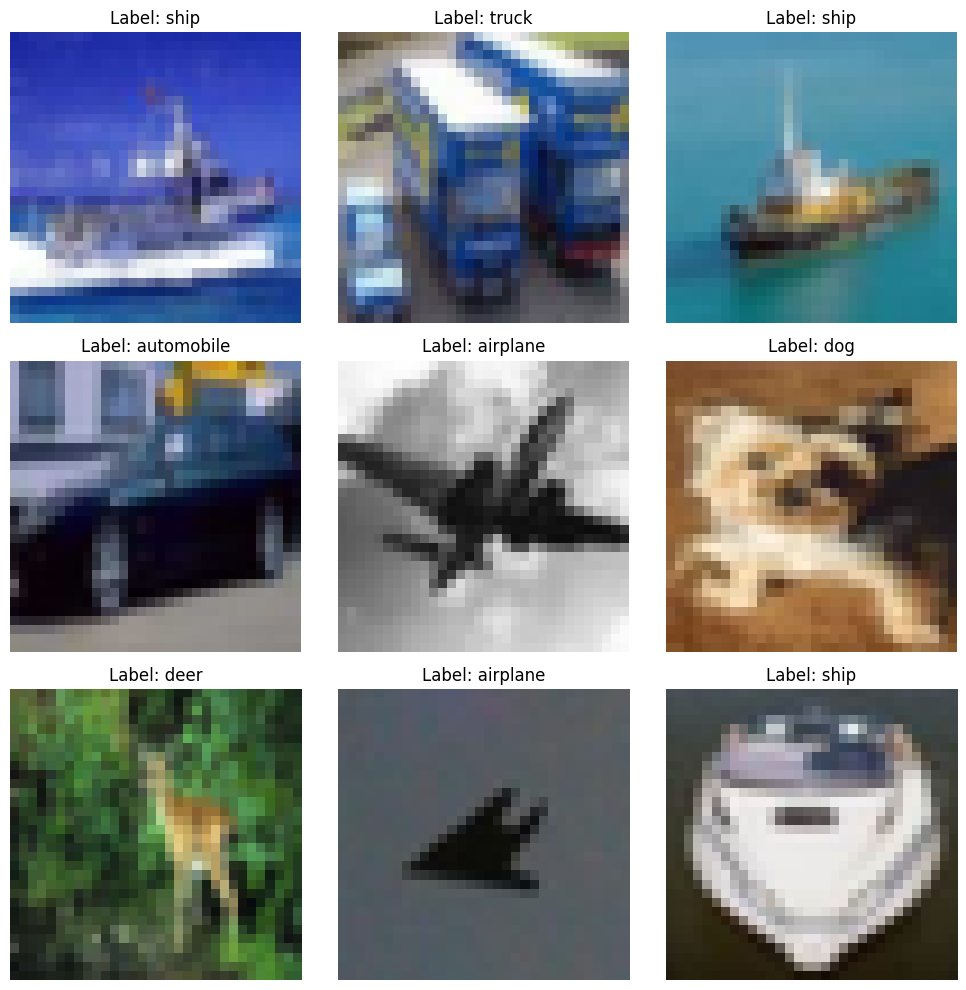

In [ ]:
torch.manual_seed(42)
# Lấy batch từ loader
images, labels = next(iter(train_dataloader))


num_images = 9
images = images[:num_images]
labels = labels[:num_images]


fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes = axes.flatten() # Chuyển ma trận axes thành mảng 1 chiều

for i in range(num_images):
    ax = axes[i]
    # Lấy axes hiện tại để vẽ hình ảnh


    image = images[i].numpy().transpose(1, 2, 0) # gpu -> cpu vì plt 0 hỗ trợ

    ax.imshow(image)
    ax.set_title(f"Label: {train_data.classes[labels[i]]}")
    ax.axis(False)

plt.tight_layout()
plt.show()

In [ ]:
import torch.nn.functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")

results = model.train(
    data="/content/CIFAR-10-dataset",
    epochs=5,
    imgsz=320,
    device=0,                     # Chạy trên GPU
    project="runs",               # Thư mục lưu kết quả huấn luyện
    name="yolo_experiment",       # Tên của thí nghiệm (tạo thư mục con)
    batch=128,                    # Batch size
    cache=True,                   # Cache dữ liệu để tăng tốc
    patience=5,                   # Dừng sớm sau 5 epochs không cải thiện
    optimizer="Adam"
)

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/CIFAR-10-dataset, epochs=5, time=None, patience=5, batch=128, imgsz=320, save=True, save_period=-1, cache=True, device=0, workers=8, project=runs, name=yolo_experiment8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning /content/CIFAR-10-dataset/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:00<?, ?it/s]


WARNING ⚠️ Classification `cache_ram` training has known memory leak in https://github.com/ultralytics/ultralytics/issues/9824, setting `cache_ram=False`.


val: Scanning /content/CIFAR-10-dataset/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.001), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/yolo_experiment8
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:50<00:00,  1.27s/it]

                   all      0.337      0.896



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:53<00:00,  1.33s/it]

                   all      0.504      0.923



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:52<00:00,  1.31s/it]

                   all       0.32      0.709



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:56<00:00,  1.41s/it]

                   all      0.587      0.935



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:47<00:00,  1.20s/it]

                   all       0.71      0.979



5 epochs completed in 0.823 hours.
Optimizer stripped from runs/yolo_experiment8/weights/last.pt, 3.2MB
Optimizer stripped from runs/yolo_experiment8/weights/best.pt, 3.2MB

Validating runs/yolo_experiment8/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/CIFAR-10-dataset/train... found 50000 images in 10 classes ✅ 
val: None...
test: /content/CIFAR-10-dataset/test... found 10000 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 40/40 [00:54<00:00,  1.36s/it]


                   all      0.711      0.979
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/yolo_experiment8


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [ ]:
y_true = []
y_preds = []


model.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)

        results = model(X)

        y_pred = torch.stack([result.probs.data.argmax(dim=0) for result in results])


        y_preds.append(y_pred.cpu())
        y_true.append(y.cpu())


y_preds = torch.cat(y_preds)
y_true = torch.cat(y_true)

Making predictions:   0%|          | 0/625 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
3: 32x32 ship 0.89, airplane 0.07, deer 0.02, bird 0.01, truck 0.00, 0.6ms
4: 32x32 airplane 0.15, bird 0.15, deer 0.14, frog 0.12, cat 0.12, 0.6ms
5: 32x32 ship 0.49, deer 0.16, airplane 0.13, bird 0.09, frog 0.04, 0.6ms
6: 32x32 ship 0.38, deer 0.27, cat 0.13, bird 0.10, airplane 0.05, 0.6ms
7: 32x32 deer 0.49, ship 0.26, bird 0.13, frog 0.06, airplane 0.03, 0.6ms
8: 32x32 ship 0.81, deer 0.10, airplane 0.05, bird 0.03, frog 0.01, 0.6ms
9: 32x32 ship 0.80, deer 0.14, bird 0.03, airplane 0.02, frog 0.01, 0.6ms
10: 32x32 ship 0.83, airplane 0.09, deer 0.04, bird 0.03, frog 0.00, 0.6ms
11: 32x32 ship 0.83, deer 0.12, bird 0.02, airplane 0.01, frog 0.01, 0.6ms
12: 32x32 ship 0.32, deer 0.29, bird 0.12, airplane 0.10, frog 0.07, 0.6ms
13: 32x32 deer 0.92, bird 0.03, frog 0.02, ship 0.02, cat 0.00, 0.6ms
14: 32x32 ship 0.38, deer 0.21, bird 0.15, airplane 0.14, frog 0.06, 0.6ms
15: 32x32 ship 0.99, airplane 0.01, deer 0.00, bird 0.00, truc

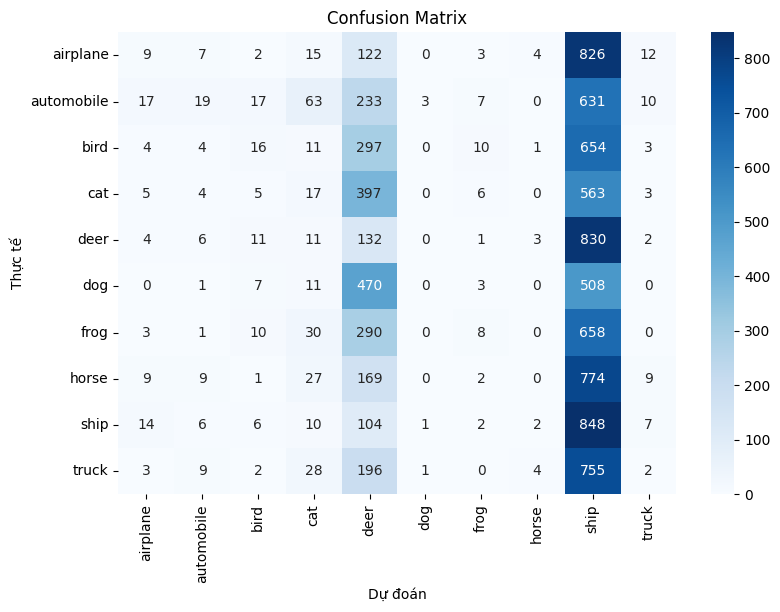

Classification Report:
              precision    recall  f1-score   support

    airplane       0.13      0.01      0.02      1000
  automobile       0.29      0.02      0.04      1000
        bird       0.21      0.02      0.03      1000
         cat       0.08      0.02      0.03      1000
        deer       0.05      0.13      0.08      1000
         dog       0.00      0.00      0.00      1000
        frog       0.19      0.01      0.02      1000
       horse       0.00      0.00      0.00      1000
        ship       0.12      0.85      0.21      1000
       truck       0.04      0.00      0.00      1000

    accuracy                           0.11     10000
   macro avg       0.11      0.11      0.04     10000
weighted avg       0.11      0.11      0.04     10000



In [ ]:
cm = confusion_matrix(y_true, y_preds)

# Vẽ confusion matrix
plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.names.values(), yticklabels=model.names.values())
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:")
print(classification_report(y_true, y_preds, target_names=list(model.names.values())))